In [ ]:
# decision tree in scikit

import pandas as pd

loan_data = pd.read_csv("./csv/loan_data.csv")
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
loan_data["emp_title"].fillna(loan_data["emp_title"].mode()[0], inplace=True)
loan_data["emp_length"].fillna(loan_data["emp_length"].mode()[0], inplace=True)
loan_data["title"].fillna(loan_data["title"].mode()[0], inplace=True)
loan_data["revol_util"].fillna(loan_data["revol_util"].median(), inplace=True)
loan_data["mort_acc"].fillna(loan_data["mort_acc"].median(), inplace=True)
loan_data["pub_rec_bankruptcies"].fillna(
    loan_data["pub_rec_bankruptcies"].median(), inplace=True
)

In [ ]:
cat_columns = loan_data.select_dtypes(include=["object", "category"]).columns.tolist()
num_columns = loan_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [ ]:
cat_columns

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [ ]:
num_columns

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
# Initialize the label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Applying label encoding to each of the categorical columns
for col in cat_columns:
    loan_data[col] = le.fit_transform(loan_data[col])

In [ ]:
# Now, the dataset should be preprocessed and ready for feature
# selection and modeling
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_title             396030 non-null  int32  
 7   emp_length            396030 non-null  int32  
 8   home_ownership        396030 non-null  int32  
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  int32  
 11  issue_d               396030 non-null  int32  
 12  loan_status           396030 non-null  int32  
 13  purpose               396030 non-null  int32  
 14  title                 396030 non-null  int32  
 15  

In [ ]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,6206
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,38135
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,307942
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,291181
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,240127


In [ ]:
# Missing values were filled with either the mode (for categorical
# columns) or the median (for numerical columns).
# Categorical columns were label-encoded to numerical values for
# compatibility with machine learning algorithms

In [ ]:
X = loan_data.drop(
    columns=["loan_status", "emp_title", "issue_d", "earliest_cr_line", "address"]
)  # Dropping non-relevant columns
y = loan_data["loan_status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
feature_importances = tree_clf.feature_importances_

In [ ]:
accuracy

0.7041890765851072

In [ ]:
conf_matrix

array([[ 4592, 10985],
       [12445, 51184]], dtype=int64)

In [ ]:
feature_importances

array([0.04507793, 0.0049767 , 0.0548494 , 0.07461699, 0.00327091,
       0.08698289, 0.04161787, 0.01281924, 0.08427486, 0.01700044,
       0.02013734, 0.05144465, 0.11388186, 0.05735229, 0.00999808,
       0.10329507, 0.09884682, 0.07401184, 0.01049358, 0.00025082,
       0.02847054, 0.00632988])

In [ ]:
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
)

In [ ]:
feature_importance

,Feature,Importance
0,loan_amnt,0.045078
1,term,0.004977
2,int_rate,0.054849
3,installment,0.074617
4,grade,0.003271
5,sub_grade,0.086983
6,emp_length,0.041618
7,home_ownership,0.012819
8,annual_inc,0.084275
9,verification_status,0.017000


In [ ]:
# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance',
ascending=False).reset_index(drop=True)
feature_importance

,Feature,Importance
0,dti,0.113882
1,revol_bal,0.103295
2,revol_util,0.098847
3,sub_grade,0.086983
4,annual_inc,0.084275
5,installment,0.074617
6,total_acc,0.074012
7,open_acc,0.057352
8,int_rate,0.054849
9,title,0.051445


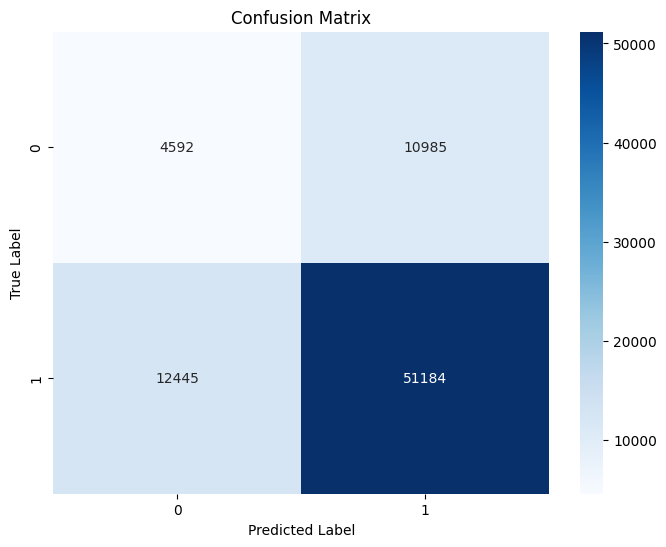

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# True Positives (TP): 51,184
# True Negatives (TN): 4,592
# False Positives (FP): 10,985
# False Negatives (FN): 12,445

In [ ]:
# Tune this model or try other machine learning algorithms to improve the results

#  The main hyperparameters to tune for Decision Trees are:

# max_depth: Maximum depth of the tree (controls overfitting).
# min_samples_split: Minimum number of samples required to split an internal node.
# min_samples_leaf: Minimum number of samples required to be at a leaf node.
# criterion: The function to measure the quality of a split (e.g., "gini" or "entropy").

In [ ]:
#  Grid Search Cross-Validation

# Importing the necessary library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Setting up the hyperparameters for tuning
param_grid = {
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"],
}

In [ ]:
# Setting up the GridSearchCV to find the best parameters

grid_search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

In [ ]:
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters from the grid search
best_params = grid_search.best_params_
# Train a new Decision Tree with the best parameters
best_tree_clf = grid_search.best_estimator_
# Evaluating the optimized model
y_pred_tuned = best_tree_clf.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_conf_matrix = confusion_matrix(y_test, y_pred_tuned)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [ ]:
tuned_accuracy

0.8033608565007702

In [ ]:
tuned_conf_matrix

array([[ 1187, 14390],
       [ 1185, 62444]], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

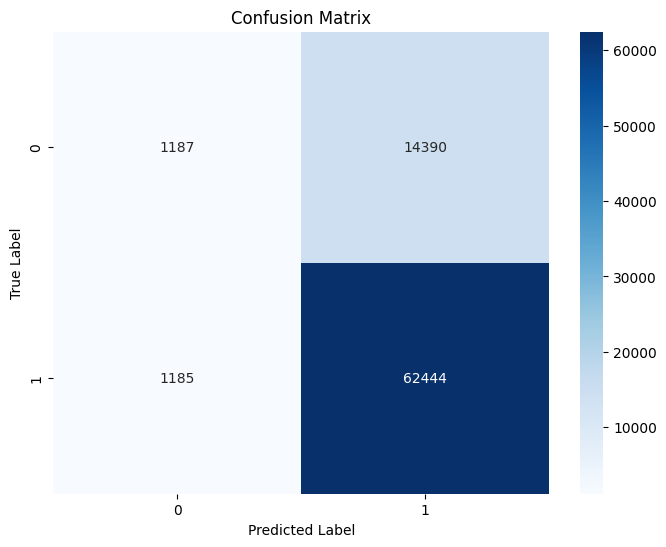

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(tuned_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# GridSearchCV is a powerful tool in scikit-learn that automates the process of finding the best hyperparameters for a given model. It searches over a set of specified parameter values, fitting the model on different combinations, and selecting the best set of parameters based on cross-validation performance.

In [ ]:
# param_grid: A dictionary specifying the hyperparameters to tune and the values to try for each.

# "max_depth": [10, 20, 30, None]: This defines the maximum depth of the decision tree. It will try trees with depths of 10, 20, 30, and no limit (None).

# "min_samples_split": [2, 10, 20]: This sets the minimum number of samples required to split an internal node. It will try 2, 10, and 20.

# "min_samples_leaf": [1, 5, 10]: This controls the minimum number of samples required to be at a leaf node.

# "criterion": ["gini", "entropy"]: These are the functions used to measure the quality of a split. The model will be tested with both Gini impurity and entropy.

# Gini impurity measuring how mixed up the data is in a particular group (or node) in a decision tree.
# If all the items in the group belong to the same class (for example, all apples or all oranges), Gini impurity is 0—the group is perfectly pure.
# If the group has a mix of different classes (like half apples, half oranges), the Gini impurity increases. A value of 0.5 means the group is split equally, making it very impure.

# Entropy is like measuring the uncertainty or disorder in the group.
# If a group is made up of just one kind of thing (all apples or all oranges), entropy is 0—there’s no uncertainty about what’s in the group.
# If the group is half apples and half oranges, entropy is at its highest because the group is most uncertain or mixed up.

# Both Gini impurity and entropy help the decision tree figure out where to split the data. The goal is to make groups that are as pure as possible.

# The tree looks at different ways to split the data and chooses the split that makes the groups less mixed (lower Gini impurity or entropy).

# In simple terms, both Gini and entropy measure how messed up or uncertain a group of data is, and decision trees aim to reduce this messiness at every step.

In [ ]:
# cv: The number of cross-validation folds. Here, cv=3 means that the data will be split into 3 folds, and the model will be trained and validated on these folds to evaluate its performance.

# scoring: This defines the metric to evaluate the performance of the model. In this case, scoring="accuracy" means the grid search will optimize for accuracy.

# n_jobs: Specifies the number of jobs (threads) to run in parallel. n_jobs=-1 uses all available CPU cores, speeding up the process.

# verbose: Controls the verbosity of the output. verbose=1 will print progress during the search, helping you monitor the process.